In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
from google.colab import files
uploaded = files.upload()

Saving petrol_consumption.csv to petrol_consumption.csv


In [3]:
df = pd.read_csv('petrol_consumption.csv')

In [4]:
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [6]:
X = df.drop(columns=['Petrol_Consumption'])  # Assuming 'Petrol_Consumption' is the target column
y = df['Petrol_Consumption']

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model

In [8]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 91.2
Mean Squared Error (MSE): 17170.8
Root Mean Squared Error (RMSE): 131.03739924159058



Feature Importance:
Petrol_tax: 0.0579
Average_income: 0.2330
Paved_Highways: 0.0420
Population_Driver_licence(%): 0.6672


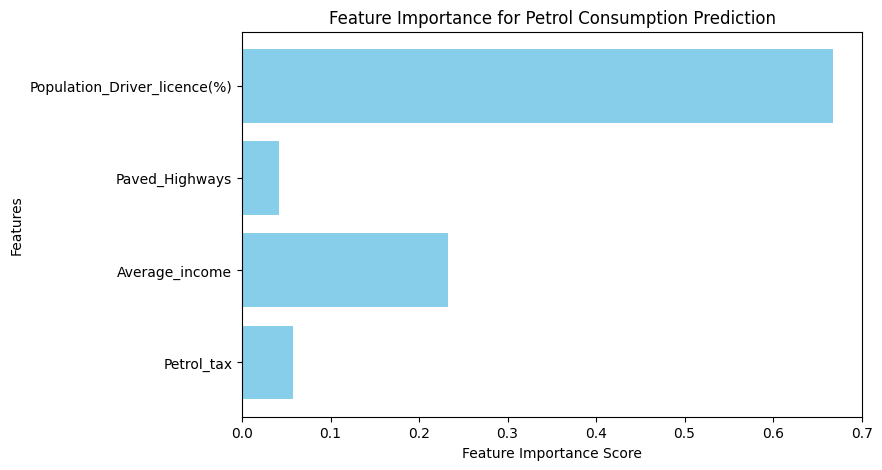

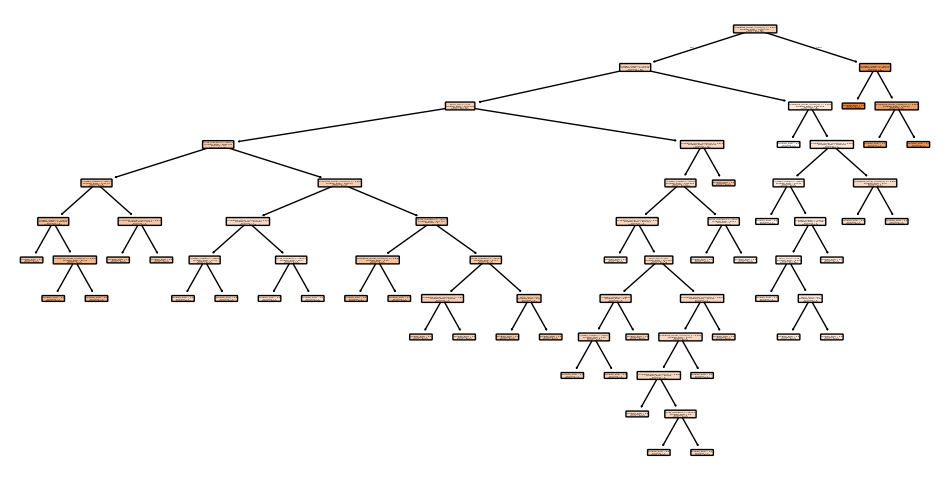

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
feature_importance = model.feature_importances_
features = X.columns

# Print feature importance
print("\nFeature Importance:")
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Petrol Consumption Prediction")
plt.show()

# Visualize the Regression Tree Structure
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=features, filled=True, rounded=True)
plt.show()